In [ ]:
# Precipitacion acumulado del año y anomalia

In [10]:
import os
import re
import numpy as np
import rasterio
from rasterio.enums import Resampling
from rasterio.merge import merge
from rasterio.plot import show
from collections import defaultdict
from datetime import datetime
from tqdm import tqdm

# Paths
input_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/precipitation_monthly'
output_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/precipitation_anomaly'
os.makedirs(output_folder, exist_ok=True)

# Regex to extract year and month
pattern = re.compile(r'wc2.1_2.5m_prec_(\d{4})-(\d{2})\.tif')

# Parse files
files = sorted([
    f for f in os.listdir(input_folder)
    if pattern.match(f)
])

# Group files by month
monthly_files = defaultdict(list)
for f in files:
    match = pattern.match(f)
    if match:
        year, month = int(match.group(1)), int(match.group(2))
        monthly_files[month].append((year, f))

# Process files
for month in tqdm(range(1, 13)):
    month_files = sorted(monthly_files[month])
    
    for i in range(len(month_files)):
        year, filename = month_files[i]
        
        # Use all available previous years (up to 10)
        if i == 0:
            continue  # Can't calculate anomaly with no history

        available_years = month_files[max(0, i-10):i]
        past_files = [os.path.join(input_folder, fname) for y, fname in available_years]
        
        # Read and stack available historical rasters
        data_stack = []
        for fpath in past_files:
            with rasterio.open(fpath) as src:
                data_stack.append(src.read(1).astype(np.float32))

        if len(data_stack) == 0:
            continue  # Just in case, though shouldn't happen

        past_avg = np.mean(data_stack, axis=0)

        # Read current raster
        current_path = os.path.join(input_folder, filename)
        with rasterio.open(current_path) as src:
            current_data = src.read(1).astype(np.float32)
            profile = src.profile

        # Compute anomaly
        anomaly = current_data - past_avg

        # Save result
        out_filename = f'anomaly_{filename}'
        out_path = os.path.join(output_folder, out_filename)
        profile.update(dtype=rasterio.float32, compress='lzw')
        with rasterio.open(out_path, 'w', **profile) as dst:
            dst.write(anomaly, 1)


print("✅ Precipitation anomaly calculation complete.")


100%|██████████| 12/12 [00:06<00:00,  1.99it/s]

✅ Precipitation anomaly calculation complete.


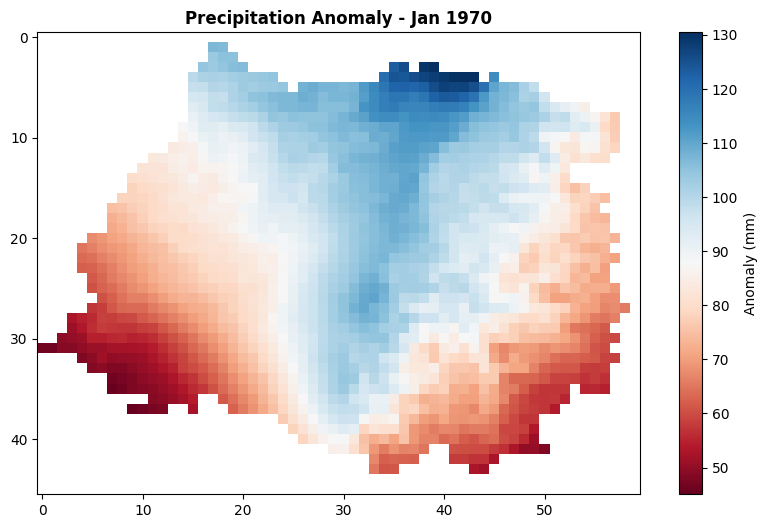

In [11]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Choose an example anomaly file to visualize
example_file = 'anomaly_wc2.1_2.5m_prec_2024-05.tif'
example_path = os.path.join(output_folder, example_file)

# Load and plot the anomaly map
with rasterio.open(example_path) as src:
    anomaly_data = src.read(1)
    fig, ax = plt.subplots(figsize=(10, 6))
    img = show(anomaly_data, ax=ax, cmap='RdBu', title=f'Precipitation Anomaly - May 2024')
    plt.colorbar(img.get_images()[0], ax=ax, label='Anomaly (mm)')


In [12]:

# Paths
input_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/min_temp_monthly'
output_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/min_temp_anomaly'
os.makedirs(output_folder, exist_ok=True)

# Regex to extract year and month
pattern = re.compile(r'wc2.1_2.5m_tmin_(\d{4})-(\d{2})\.tif')

# Parse files
files = sorted([
    f for f in os.listdir(input_folder)
    if pattern.match(f)
])

# Group files by month
monthly_files = defaultdict(list)
for f in files:
    match = pattern.match(f)
    if match:
        year, month = int(match.group(1)), int(match.group(2))
        monthly_files[month].append((year, f))

# Process files
for month in tqdm(range(1, 13)):
    month_files = sorted(monthly_files[month])
    
    for i in range(len(month_files)):
        year, filename = month_files[i]
        
        # Use all available previous years (up to 10)
        if i == 0:
            continue  # Can't calculate anomaly with no history

        available_years = month_files[max(0, i-10):i]
        past_files = [os.path.join(input_folder, fname) for y, fname in available_years]
        
        # Read and stack available historical rasters
        data_stack = []
        for fpath in past_files:
            with rasterio.open(fpath) as src:
                data_stack.append(src.read(1).astype(np.float32))

        if len(data_stack) == 0:
            continue  # Just in case, though shouldn't happen

        past_avg = np.mean(data_stack, axis=0)

        # Read current raster
        current_path = os.path.join(input_folder, filename)
        with rasterio.open(current_path) as src:
            current_data = src.read(1).astype(np.float32)
            profile = src.profile

        # Compute anomaly
        anomaly = current_data - past_avg

        # Save result
        out_filename = f'anomaly_{filename}'
        out_path = os.path.join(output_folder, out_filename)
        profile.update(dtype=rasterio.float32, compress='lzw')
        with rasterio.open(out_path, 'w', **profile) as dst:
            dst.write(anomaly, 1)


print("✅ Min temp anomaly calculation complete.")


100%|██████████| 12/12 [00:05<00:00,  2.02it/s]

✅ Min temp anomaly calculation complete.


In [13]:

# Paths
input_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/max_temp_monthly'
output_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/max_temp_anomaly'
os.makedirs(output_folder, exist_ok=True)

# Regex to extract year and month
pattern = re.compile(r'wc2.1_2.5m_tmax_(\d{4})-(\d{2})\.tif')

# Parse files
files = sorted([
    f for f in os.listdir(input_folder)
    if pattern.match(f)
])

# Group files by month
monthly_files = defaultdict(list)
for f in files:
    match = pattern.match(f)
    if match:
        year, month = int(match.group(1)), int(match.group(2))
        monthly_files[month].append((year, f))

# Process files
for month in tqdm(range(1, 13)):
    month_files = sorted(monthly_files[month])
    
    for i in range(len(month_files)):
        year, filename = month_files[i]
        
        # Use all available previous years (up to 10)
        if i == 0:
            continue  # Can't calculate anomaly with no history

        available_years = month_files[max(0, i-10):i]
        past_files = [os.path.join(input_folder, fname) for y, fname in available_years]
        
        # Read and stack available historical rasters
        data_stack = []
        for fpath in past_files:
            with rasterio.open(fpath) as src:
                data_stack.append(src.read(1).astype(np.float32))

        if len(data_stack) == 0:
            continue  # Just in case, though shouldn't happen

        past_avg = np.mean(data_stack, axis=0)

        # Read current raster
        current_path = os.path.join(input_folder, filename)
        with rasterio.open(current_path) as src:
            current_data = src.read(1).astype(np.float32)
            profile = src.profile

        # Compute anomaly
        anomaly = current_data - past_avg

        # Save result
        out_filename = f'anomaly_{filename}'
        out_path = os.path.join(output_folder, out_filename)
        profile.update(dtype=rasterio.float32, compress='lzw')
        with rasterio.open(out_path, 'w', **profile) as dst:
            dst.write(anomaly, 1)


print("✅ Max temp anomaly calculation complete.")


100%|██████████| 12/12 [00:05<00:00,  2.01it/s]

✅ Max temp anomaly calculation complete.


In [14]:
# Accumulated precip
import os
import re
import numpy as np
import rasterio
from collections import defaultdict
from tqdm import tqdm

# Set your input/output folders
input_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/precipitation_monthly'
output_folder = '/Users/abbystokes/Documents/GitHub/wildfire-risk-ml/capas/clima/WorldClim_Maule/accumulated_annual_precipitation'
os.makedirs(output_folder, exist_ok=True)

# Regex pattern to extract year and month
pattern = re.compile(r'wc2.1_2.5m_prec_(\d{4})-(\d{2})\.tif')

# Organize files by year
year_month_files = defaultdict(dict)
for f in os.listdir(input_folder):
    match = pattern.match(f)
    if match:
        year = int(match.group(1))
        month = int(match.group(2))
        year_month_files[year][month] = f

# Sort years
years = sorted(year_month_files.keys())

# Process year by year
for year in tqdm(years):
    cumulative = None
    for month in range(1, 13):
        fname = year_month_files[year].get(month)
        if not fname:
            continue  # skip if month missing

        path = os.path.join(input_folder, fname)
        with rasterio.open(path) as src:
            data = src.read(1).astype(np.float32)
            profile = src.profile

        if cumulative is None:
            cumulative = data.copy()
        else:
            cumulative += data

        # Save cumulative raster
        out_filename = f'accumulated_prec_{year}-{month:02d}.tif'
        out_path = os.path.join(output_folder, out_filename)
        profile.update(dtype=rasterio.float32, compress='lzw')
        with rasterio.open(out_path, 'w', **profile) as dst:
            dst.write(cumulative, 1)

print("✅ Accumulated precipitation rasters saved.")


100%|██████████| 65/65 [00:01<00:00, 35.49it/s]

✅ Accumulated precipitation rasters saved.


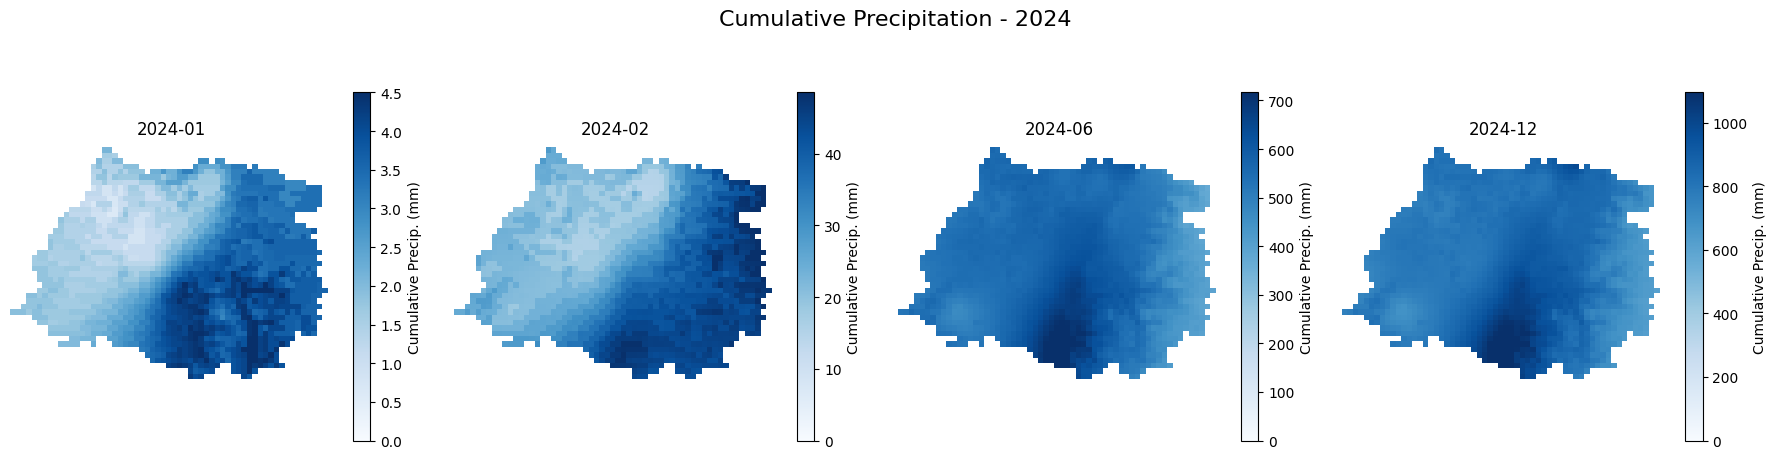

In [15]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Choose a year and months to visualize
year = 2024
months_to_plot = [1, 2, 6, 12]  # January to April


fig, axes = plt.subplots(1, len(months_to_plot), figsize=(18, 5))
fig.suptitle(f'Cumulative Precipitation - {year}', fontsize=16)

for i, month in enumerate(months_to_plot):
    file = f'accumulated_prec_{year}-{month:02d}.tif'
    path = os.path.join(output_folder, file)

    with rasterio.open(path) as src:
        data = src.read(1)
        profile = src.profile

    ax = axes[i]
    im = ax.imshow(data, cmap='Blues', vmin=0, vmax=np.nanpercentile(data, 98))
    ax.set_title(f'{year}-{month:02d}')
    ax.axis('off')

    # Add individual colorbars
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_label('Cumulative Precip. (mm)', fontsize=10)

plt.tight_layout()
plt.show()